In [30]:
%matplotlib inline

import scipy.io as sio
from pyleoclim import Spectral

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

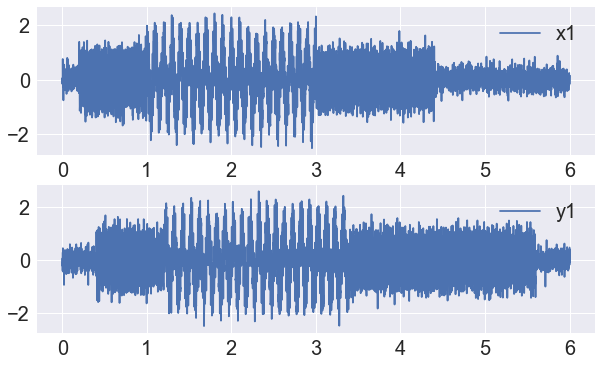

In [31]:
data = sio.loadmat('./wtc_test_data.mat')
x1 = data['x1'].T[:, 0]
y1 = data['y1'].T[:, 0]
t = data['t'].T[:, 0]

sns.set(style="darkgrid", font_scale=2)
fig = plt.figure(figsize=[10, 6])
ax1 = plt.subplot(2, 1, 1)
ax1.plot(t, x1, label='x1')
ax1.legend()
ax2 = plt.subplot(2, 1, 2)
ax2.plot(t, y1, label='y1')
ax2.legend()

In [32]:
tau = np.linspace(np.min(t), np.max(t), 101)
scale = np.logspace(-9, 2, num=201, base=2)
scale = scale[::-1]
freqs = 1/scale

res_xwc = Spectral.xwc(
    x1, t, y1, t, tau=tau, nMC=10, freqs=freqs
)

Monte-Carlo simulations: 100%|██████████| 10/10 [00:05<00:00,  1.78it/s]


/Users/fzhu/.pyenv/versions/anaconda3-5.0.1/envs/py3.6/lib/python3.6/site-packages/pyleoclim-0.3.1-py3.6.egg/pyleoclim/Spectral.py:2476: RuntimeWarning: invalid value encountered in less
  phase[xw_coherence < .5] = np.nan


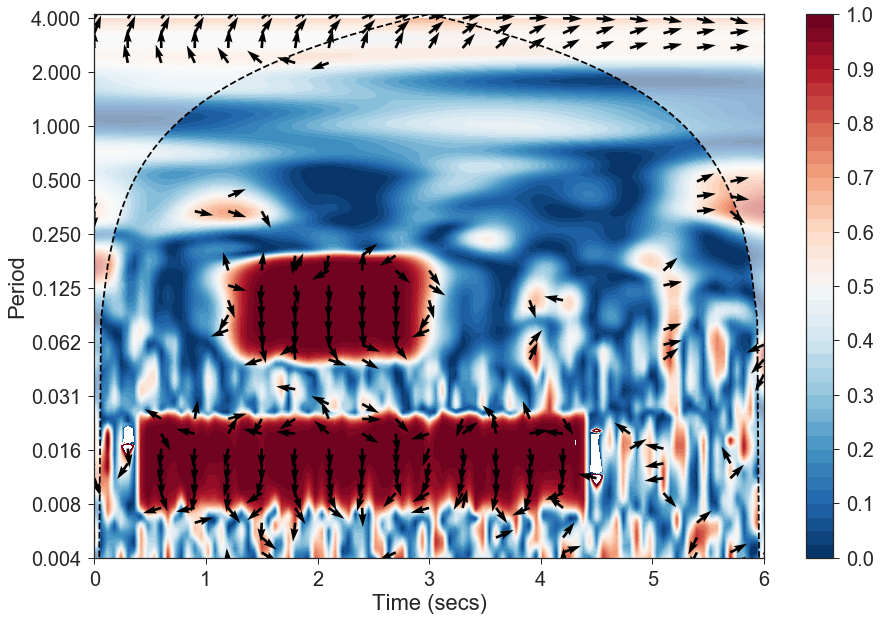

In [33]:
period_ticks = [1/256, 1/128, 1/64, 1/32, 1/16, 1/8, 1/4, 1/2, 1, 2, 4]
ax = Spectral.plot_coherence(res_xwc, figsize=[15, 10],
                             levels=np.linspace(0, 1., 41),
                             tick_range=np.linspace(0, 1., 11),
                             clr_map='RdBu_r',
                             yticks=period_ticks,
                             ylim=[np.min(period_ticks), np.max(res_xwc.coi)],
                             xlabel='Time (secs)',
                             plot_cone=True,
                             # adjust arrows
                             exg=5,
                             scale=35,
                             width=0.004
                            )